# Lab 08. GTZAN Dataset – 샘플 음성 데이터 `mel_spec` 변환 및 Augmentation 적용
---

In [1]:
import matplotlib.pyplot as plt

import librosa
import librosa.display

import os
import glob
import numpy as np 
import IPython
import random

In [2]:
audio = "./data/blues.00001.wav"

data, sr = librosa.load(audio, sr=22050) # librosa.load(오디오 파일 경로, 샘플링 주파수)

In [3]:
# STFT 계산 
stft = librosa.stft(data)

mel_spec = librosa.feature.melspectrogram(S=abs(stft))
mel_spec_db = librosa.amplitude_to_db(mel_spec, ref=np.max)

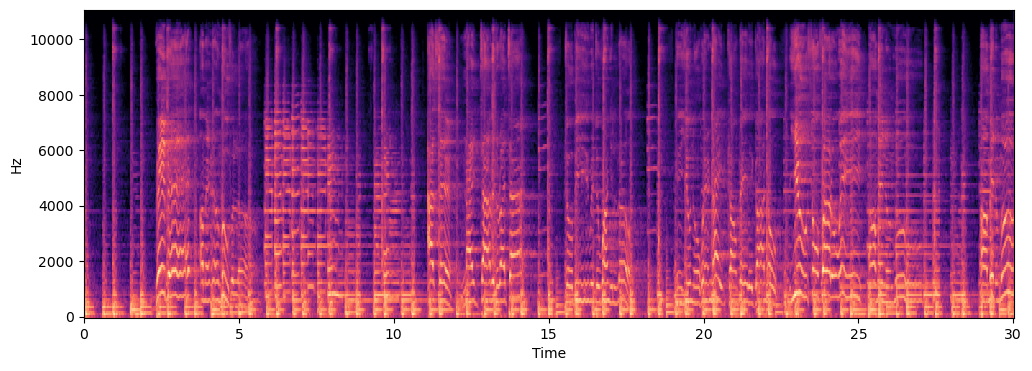

In [4]:
plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./result/mel_spec_original.png", bbox_inches='tight', pad_inches=0)

## 0~10초 구간 파형을 추출 하여 이미지 저장

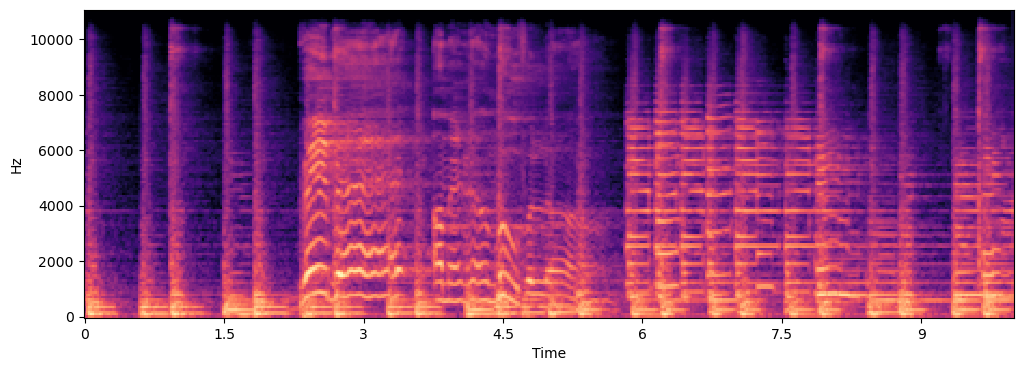

In [5]:
start_time = 0
end_time = 10
start_sample = sr * start_time
end_sample = sr * end_time

data_section_stft = data[start_sample : end_sample]

stft_temp = librosa.stft(data_section_stft)

# 멜 스펙트로그램 계산
mel_spec_temp = librosa.feature.melspectrogram(S=abs(stft_temp))

# dB 변경
mel_spec_db_temp = librosa.amplitude_to_db(mel_spec_temp, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_db_temp, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./result/mel_spec_0-10.png", bbox_inches='tight', pad_inches=0)

## 샘플 음성 데이터의 `mel_spec` 변환 및 Augmentation 적용

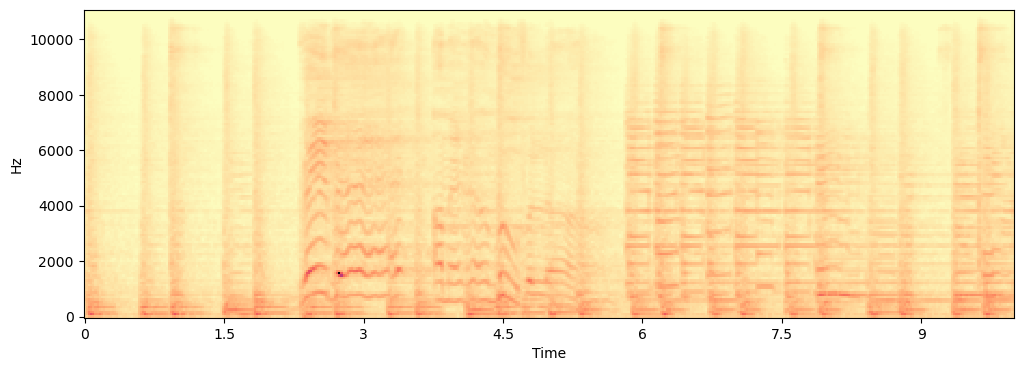

In [6]:
stft_temp_01 = librosa.stft(data_section_stft)

mel_spec_temp01 = librosa.feature.melspectrogram(S=abs(stft_temp_01))

# dB 변경
mel_spec_db_temp01 = librosa.amplitude_to_db(mel_spec_temp01, ref=np.max)

# 노이즈 추가 
noise = 0.2 * np.random.randn(*mel_spec_db_temp01.shape)
augmentation_noise_spec = mel_spec_db_temp01 + noise

# dB 변경
augmentation_spce_db = librosa.amplitude_to_db(augmentation_noise_spec, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(augmentation_spce_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./result/mel_spec_0-10_aug_noise.png", bbox_inches='tight', pad_inches=0)

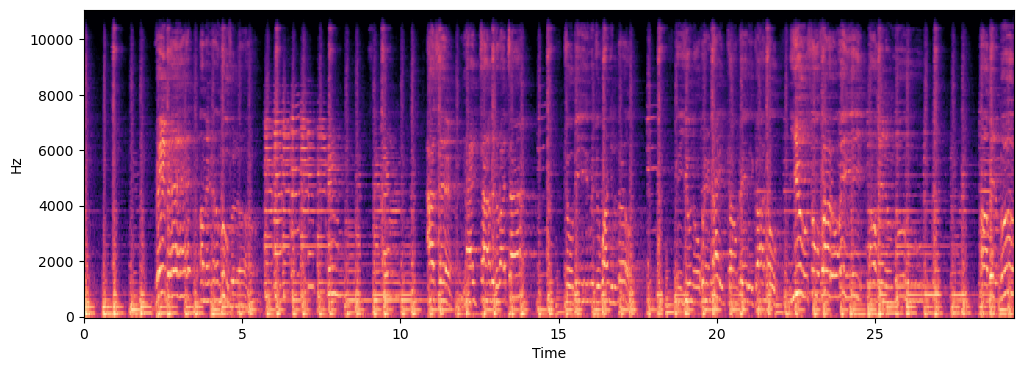

In [7]:
rate = np.random.uniform(low=0.8, high=1.2)
stretched = librosa.effects.time_stretch(data, rate=rate)

stft_streched = librosa.stft(stretched)

mel_spec_streched = librosa.feature.melspectrogram(S=abs(stft_streched))

mel_spec_streched_db = librosa.amplitude_to_db(mel_spec_streched, ref=np.max)

plt.figure(figsize=(12, 4))
librosa.display.specshow(mel_spec_streched_db, sr=sr, x_axis='time', y_axis='hz')
# plt.axis('off')
plt.savefig("./result/mel_spec_0-10_aug_streched.png", bbox_inches='tight', pad_inches=0)